In [13]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [14]:
DATA_PATH='../../'
COV='RaTG13'
BLAST_OUT=DATA_PATH+COV+'/Blastn/dataframes/'

In [19]:
SL3_R1_run0='Sars_SL3_R1_171127_10000_95pct_hits_df.csv'
SL3_R2_run0='Sars_SL3_R2_171127_10000_95pct_hits_df.csv'

SL3_R1_run3='Sars_SL3_R1_171127_run3_10000_95pct_hits_df.csv'
SL3_R2_run3='Sars_SL3_R2_171127_run3_10000_95pct_hits_df.csv'


In [22]:
df1=pd.read_csv(BLAST_OUT+SL3_R1_run0)
df2=pd.read_csv(BLAST_OUT+SL3_R2_run0)

In [23]:
df3=pd.read_csv(BLAST_OUT+SL3_R1_run3)
df4=pd.read_csv(BLAST_OUT+SL3_R1_run3)

In [24]:
df1.head()

,idx,title,text_title
0,5953530,gi|1690489457|gb|MK280367.1| Homo sapi...,"Homo sapiens lncAB371.6 lncRNA gene, complete..."
1,4900712,gi|1828350098|gb|CP050588.1| Canis lup...,Canis lupus familiaris breed Labrador retriev...
2,6195781,gi|1823847213|ref|XM_033110683.1| PRE...,PREDICTED: Rhinolophus ferrumequ...
3,1824715,gi|1848982279|ref|XR_004669553.1| PRE...,PREDICTED: Pan paniscus 18S ribo...
4,8253877,gi|1823829055|ref|XM_033119701.1| PRE...,PREDICTED: Rhinolophus ferrumequ...


In [25]:
frames = [df3, df4]
df = pd.concat(frames)

In [26]:
df.head()

,idx,title,accession,hit_id,length,query_length,text_title
0,6546590,gi|1848010746|dbj|AP023165.1| Felis catus Sen...,AP023165,gi|1848010746|dbj|AP023165.1|,65441144,151,"Felis catus Senzu DNA, chromosome: E1, America..."
1,6546590,gi|1848010746|dbj|AP023165.1| Felis catus Sen...,AP023165,gi|1848010746|dbj|AP023165.1|,65441144,151,"Felis catus Senzu DNA, chromosome: E1, America..."
2,6546590,gi|1848010746|dbj|AP023165.1| Felis catus Sen...,AP023165,gi|1848010746|dbj|AP023165.1|,65441144,151,"Felis catus Senzu DNA, chromosome: E1, America..."
3,2595737,gi|1838278575|ref|XR_004550925.1| PREDICTED: ...,XR_004550925,gi|1838278575|ref|XR_004550925.1|,4338,64,PREDICTED: Melopsittacus undulatus 28S ribosom...
4,8480420,gi|1829791469|emb|LR792548.1| Pseudochaenicht...,LR792548,gi|1829791469|emb|LR792548.1|,53425585,39,"Pseudochaenichthys georgianus genome assembly,..."


In [27]:
df.drop(columns=['accession','hit_id','length','query_length'],inplace=True)

In [28]:
frames = [df1, df2, df]
df = pd.concat(frames)

In [29]:
len(df)

637

In [30]:
df

,idx,title,text_title
0,5953530,gi|1690489457|gb|MK280367.1| Homo sapi...,"Homo sapiens lncAB371.6 lncRNA gene, complete..."
1,4900712,gi|1828350098|gb|CP050588.1| Canis lup...,Canis lupus familiaris breed Labrador retriev...
2,6195781,gi|1823847213|ref|XM_033110683.1| PRE...,PREDICTED: Rhinolophus ferrumequ...
3,1824715,gi|1848982279|ref|XR_004669553.1| PRE...,PREDICTED: Pan paniscus 18S ribo...
4,8253877,gi|1823829055|ref|XM_033119701.1| PRE...,PREDICTED: Rhinolophus ferrumequ...
...,...,...,...
159,1770508,gi|532878995|gb|KC909245.1| Rhinolophus eurya...,Rhinolophus euryale isolate REM0134 microsatel...
160,7152670,gi|1829791469|emb|LR792548.1| Pseudochaenicht...,"Pseudochaenichthys georgianus genome assembly,..."
161,4201923,gi|1674370760|emb|LR584233.2| Takifugu rubrip...,"Takifugu rubripes genome assembly, chromosome:..."
162,8163229,gi|74356117|gb|AC149631.3| Rhinolophus ferrum...,"Rhinolophus ferrumequinum clone VMRC7-80B12, c..."


In [37]:
df.text_title = df.text_title.str.replace('            ', '')
df.text_title = df.text_title.str.strip()

In [38]:
titles=df.text_title.to_list()

In [39]:
titles.sort()

In [40]:
titles

['Anas platyrhynchos genome assembly, chromosome: U,',
 'Anas platyrhynchos genome assembly, chromosome: U,',
 'Arabidopsis thaliana genome assembly, chromosome 5 ,',
 'Bos mutus isolate yakQH1 chromosome 15,',
 'Bos mutus isolate yakQH1 chromosome 15,',
 'Bos mutus isolate yakQH1 chromosome 16 ,',
 'Bos mutus isolate yakQH1 chromosome 21 ,',
 'Bos mutus isolate yakQH1 chromosome 22 ,',
 'Bos mutus isolate yakQH1 chromosome 25 ,',
 'Bos mutus isolate yakQH1 chromosome 26,',
 'Bos mutus isolate yakQH1 chromosome 26,',
 'Canis lupus familiaris breed Labrador retriever chromosome 04a ,',
 'Canis lupus familiaris breed Labrador retriever chromosome 07a ,',
 'Canis lupus familiaris breed Labrador retriever chromosome 07a,',
 'Canis lupus familiaris breed Labrador retriever chromosome 07a,',
 'Canis lupus familiaris breed Labrador retriever chromosome 10a',
 'Canis lupus familiaris breed Labrador retriever chromosome 13a ,',
 'Canis lupus familiaris breed Labrador retriever chromosome 15a ,'

In [35]:
human = [x for x in titles if x.startswith('Human')]
homo_sapiens = [x for x in titles if x.startswith('Homo sapiens')]

In [36]:
print(f'Homo sapiens percantage: {((len(human)+len(homo_sapiens))/len(titles))*100}')

Homo sapiens percantage: 9.57613814756672


In [41]:
seqs, counts = np.unique(titles, return_counts=True)

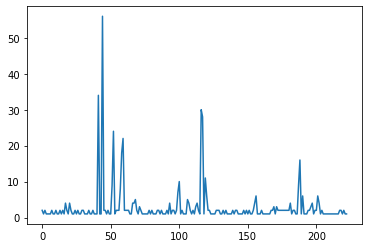

In [42]:
plt.plot(counts)

In [43]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

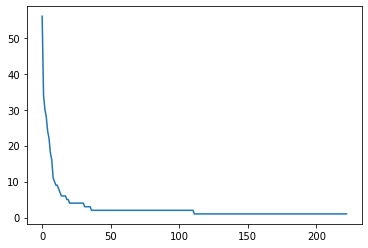

In [44]:
plt.plot(counts)

Most common ten frequencies

In [46]:
counts[:10]

(56, 34, 30, 28, 24, 22, 18, 16, 11, 10)

In [47]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus']

In [48]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]

In [49]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)

In [50]:
bat_tot

146

In [51]:
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 22.919937205651493


In [52]:
carp=[x for x in titles if 'carpio' in x]

In [53]:
print(f'Carp percantage: {(len(carp)/len(titles))*100}')

Carp percantage: 0.15698587127158556


Also carp here but nowhere near as prevalent as in RmYN02 hots

In [54]:
clonig_vectors=[x for x in titles if x.startswith('Cloning vector')]

In [55]:
clonig_vectors

[]

Blast hits to RaTG13 raw sequences, from most to least frequent

In [57]:
seqs

('Felis catus Senzu DNA, chromosome: E1, American Shorthair breed,',
 'Felis catus Senzu DNA, chromosome E1, American Shorthair breed ,',
 'PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA ,',
 'PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA,',
 'Hirundo smithii voucher B-39509 external transcribed spacer, partial sequence; 18S ribosomal RNA gene, complete sequence; and internal transcribed spacer 1, partial sequence,',
 'Homo sapiens lncAB371.6 lncRNA gene, complete sequence,',
 'Homo sapiens lncAB371.6 lncRNA gene, complete sequence ,',
 'Rhinolophus affinis mitochondrion, complete genome,',
 'PREDICTED: Phyllostomus discolor 28S ribosomal RNA (LOC114512504), rRNA ,',
 'PREDICTED: Canis lupus familiaris 28S ribosomal RNA (LOC119880519), rRNA,',
 'Rhinolophus affinis mitochondrion, complete genome ,',
 'Hirundo smithii voucher B-39509 external transcribed spacer, partial sequence; 18S ribosomal RNA gene, complete sequence; and internal transcribed spacer 